<a href="https://colab.research.google.com/github/yusufbaykal/Covid19-Turkey/blob/main/Covid19_Turkey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly as py
from plotly.offline import iplot
import missingno as msno

In [87]:
df = pd.read_csv("/content/TurkeyCovid19Dataset.csv")

In [88]:
df.head()

,Date,Daily Test,Daily Cases,Daily Deaths,Daily Recovering,Total Intensive Care,Total Intubated
0,11-27 March,47823,5698,92,42,0.0,0.0
1,28 March,7641,1704,16,28,445.0,309.0
2,29 March,9982,1815,23,35,568.0,394.0
3,30 March,11535,1610,37,57,725.0,523.0
4,31 March,15422,2704,46,81,847.0,622.0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  240 non-null    object 
 1   Daily Test            240 non-null    int64  
 2   Daily Cases           240 non-null    int64  
 3   Daily Deaths          240 non-null    int64  
 4   Daily Recovering      240 non-null    int64  
 5   Total Intensive Care  124 non-null    float64
 6   Total Intubated       124 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 13.2+ KB


In [90]:
df.isnull().sum()

Date                      0
Daily Test                0
Daily Cases               0
Daily Deaths              0
Daily Recovering          0
Total Intensive Care    116
Total Intubated         116
dtype: int64

In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Test,240.0,71208.754167,40906.710428,7641.0,39328.25,50779.5,111419.25,158811.0
Daily Cases,240.0,1836.687500,1009.122917,786.0,1181.00,1540.0,2135.25,5698.0
Daily Deaths,240.0,50.912500,31.886643,14.0,20.00,51.0,73.25,141.0
Daily Recovering,240.0,1545.104167,999.797177,28.0,1009.00,1295.0,1615.75,5231.0
Total Intensive Care,124.0,1117.685484,395.700683,0.0,773.50,1126.5,1317.75,1922.0
Total Intubated,124.0,537.298387,267.464882,0.0,360.50,400.5,769.00,1087.0


In [92]:
df["Total Intensive Care"].mean()

1117.6854838709678

In [93]:
 df["Total Intubated"].mean()

537.2983870967741

In [94]:
df["Total Intensive Care"].fillna(value=df["Total Intensive Care"].mean(), inplace=True)

In [95]:
df["Total Intubated"].fillna(value=df["Total Intubated"].mean(), inplace=True)

In [96]:
print("Toplam Test Sayısı {}".format(df["Daily Test"].sum()))
print("Toplam Ölüm Sayısı {}".format(df["Daily Deaths"].sum()))
print("Toplam Yoğun Bakım Hasta Sayısı {}".format(df["Total Intensive Care"].sum()))
print("Toplam Entübe Hasta Sayısı {}".format(df["Total Intubated"].sum()))

Toplam Test Sayısı 17090101
Toplam Ölüm Sayısı 12219
Toplam Yoğun Bakım Hasta Sayısı 268244.51612903224
Toplam Entübe Hasta Sayısı 128951.61290322582


In [97]:
def months(n):
    mlist = n.split()
    month = mlist[1]
    return month

In [98]:
df.insert(0,"Months",df["Date"].apply(months))

In [99]:
dfgrup = df.groupby("Months")

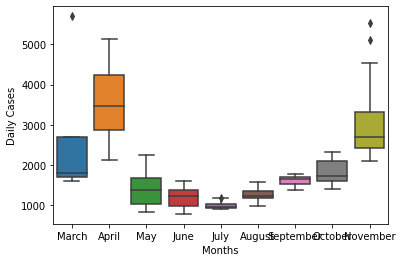

In [101]:
#Aylara göre vaka sayıları
sns.boxplot(x="Months",y = "Daily Cases",data=df);

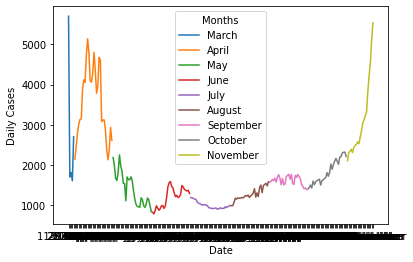

In [102]:
sns.lineplot(x="Date",y="Daily Cases",hue="Months",data=df);

In [103]:
df["Months"].unique()

array(['March', 'April', 'May', 'June', 'July', 'August', 'September',
       'October', 'November'], dtype=object)

In [144]:
import plotly.express as px
aylar_degisim = df.groupby(['Months'], sort = False)['Daily Cases',"Daily Recovering","Months"].max()
top10 = aylar_degisim.sort_values('Daily Cases', ascending = False)[:15]
fig = px.scatter(top10,
                x = top10.index,
                y = 'Daily Cases',
                size = 'Daily Recovering',
                color = top10.index,
                template = 'xgridoff',
                title = 'Aylara Göre vaka sayısı ve iyileşleşme oranı')
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



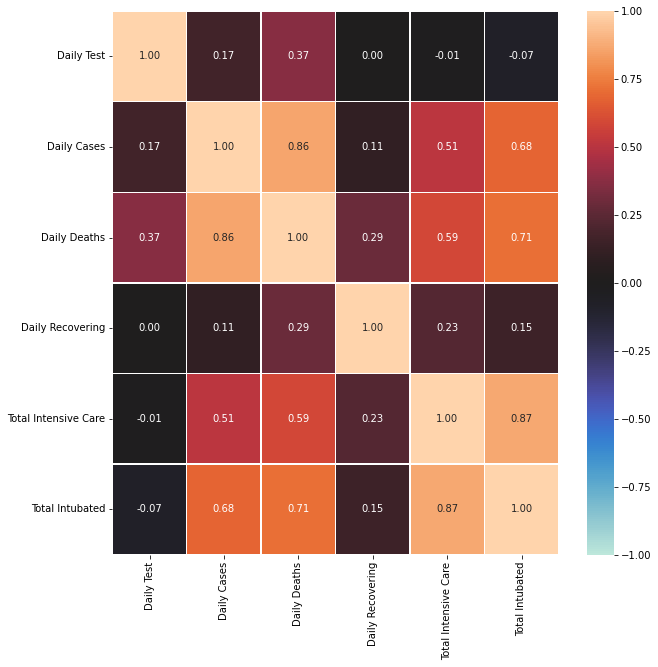

In [106]:
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot(1,1,1)

sns.heatmap(df.iloc[:,0:10].corr(), annot=True, fmt=".2f", linewidths=.5,vmin=-1, vmax=1, center= 0,ax=ax1) 

In [137]:
import plotly.express as px
fig = px.pie(df, values='Daily Cases', names='Months', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title_text="Aylara Göre Vaka Oranları",showlegend=False)
fig.show()

In [136]:
import plotly.express as px
fig = px.pie(df, values='Daily Deaths', names='Months', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title_text="Aylara Göre Ölüm Oranları",showlegend=False)
fig.show()

In [146]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=1, cols=2)
fig.add_trace(
    go.Bar(x=df['Daily Cases'], y=df['Months'],
           orientation='h'),
    row=1, col=1
)
fig.add_trace(
    go.Bar(x=df['Daily Recovering'], y=df['Months'],
           orientation='h'),
    row=1, col=2
)
fig.update_yaxes(categoryorder='total ascending')
fig.update_layout(height=600, width=800, title_text="Vaka Sayıları(B) ve İyileşme Sayıları(R)", showlegend=False)
fig.show()